# Exploratory Data Analysis-Retail

# Author-Adarsh Tiwari

# THE SPARKS FOUNDATION (GRIP): DATA SCIENCE AND BUSINESS ANALYTICS

    Aim-"Exploratory Data Analysis on dataset-'SampleSuperstore'

        As a business manager try to find out the weak areas where you can 
        work to make profit
        
        Derive business problem by exploring data
                

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

## Data Import and Analysis

In [2]:
#reading the dataset
ds_store=pd.read_csv('SampleSuperstore.csv')

In [3]:
ds_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
ds_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
ds_store.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [6]:
#statistical data analysis
ds_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
ds_store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
ds_store.shape

(9994, 13)

In [13]:
ds_store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

It appears dataset has no null or empty values

In [14]:
ds_store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [18]:
ds_store.duplicated().sum()

17

Dataset has 17 duplicate entries

In [22]:
ds_store=ds_store.drop_duplicates()
#dropping the duplocate entries

In [25]:
print('Total quantities sold are {}'.format(ds_store['Quantity'].sum()))
print('Total sales are {}'.format(ds_store['Sales'].sum()))
print('Total profit {}'.format(ds_store['Profit'].sum()))

Total quantities sold are 37820
Total sales are 2296195.5903
Total profit 286241.4226


## Data Visualization

<AxesSubplot:>

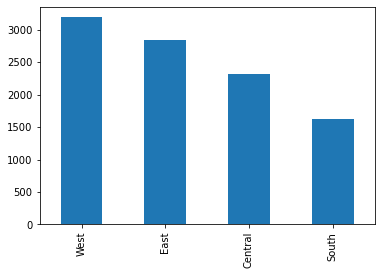

In [27]:
ds_store['Region'].value_counts().plot.bar()

IT TELLS MAXIMUM TRANSACTIONS WERE MADE IN WEST REGION

<AxesSubplot:ylabel='Category'>

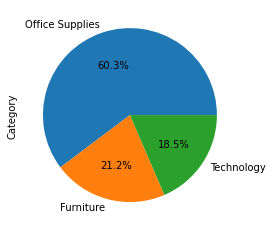

In [30]:
ds_store.Category.value_counts().plot.pie(autopct="%.1f%%")

Most items bought come in Office Supplies Category

C:\Users\adars\AppData\Local\Temp/ipykernel_1028/1079336602.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ds_store.groupby(['Region'])['Sales','Profit'].sum().plot.bar(figsize=(12,6))


Text(0.5, 1.0, 'REGION WISE SALES AND PROFIT')

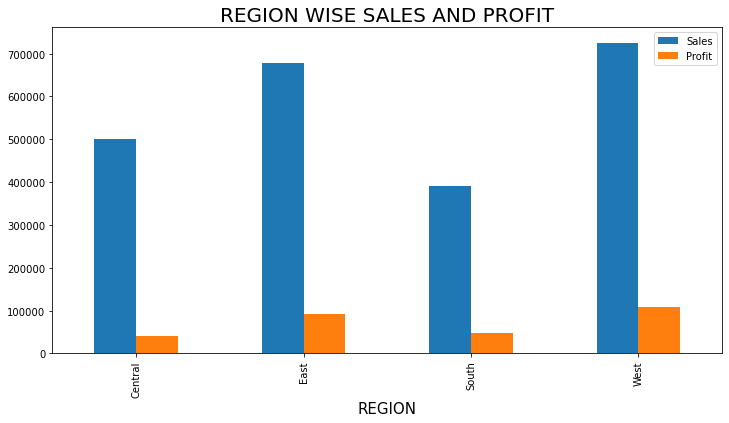

In [31]:
ds_store.groupby(['Region'])['Sales','Profit'].sum().plot.bar(figsize=(12,6))
plt.xlabel("REGION",fontdict={'color':'black','fontsize':15})
plt.title("REGION WISE SALES AND PROFIT",fontdict={'color':'black','fontsize':20})

Above plot tells us that the maximum sakes and profit happened in west region

In [34]:
#filter out warnings
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'SEGMENT WISE SALES AND PROFIT')

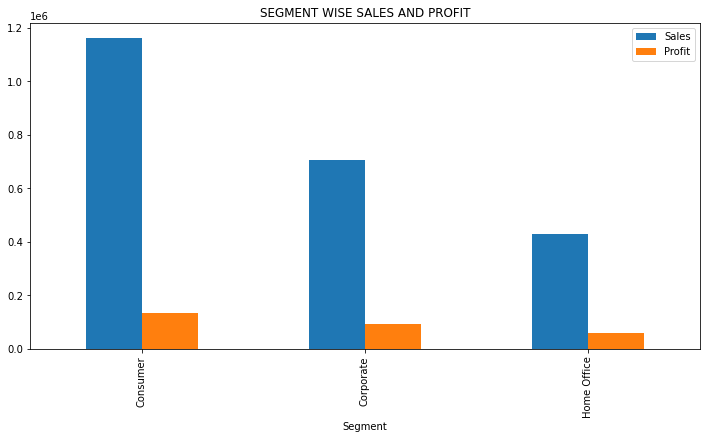

In [36]:
ds_store.groupby(['Segment'])['Sales','Profit'].sum().plot.bar(figsize=(12,6))
plt.title("SEGMENT WISE SALES AND PROFIT")

    From the above bar plot we explore that Consumer segment has maximum buying capacity and  maximum profit to Superstore 

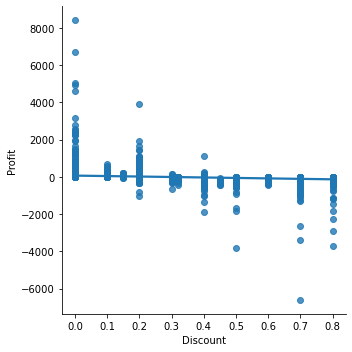

In [43]:
sns.lmplot(x='Discount',y='Profit',data=ds_store)

Above graph explains that profit reduces with discount which means they are negatively correlated

In [44]:
corr=ds_store.corr()

<AxesSubplot:>

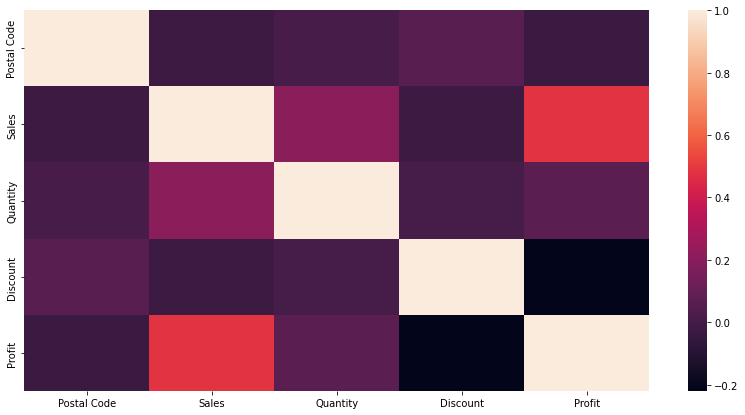

In [47]:
plt.subplots(figsize=(14,7))
sns.heatmap(corr)

    Above data tells us that sales and profit are somewhat positively correlated

Text(0.5, 1.0, ' SALES vs SUB-CATEGORY')

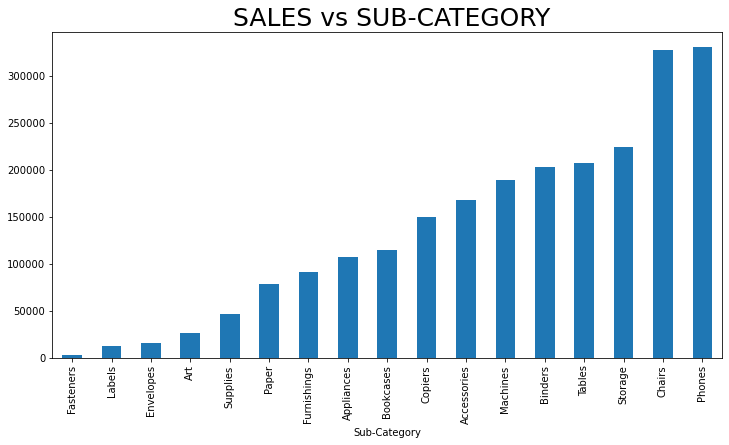

In [49]:
ds_store.groupby(['Sub-Category'])['Sales'].sum().sort_values().plot.bar(figsize=(12,6))
plt.title(" SALES vs SUB-CATEGORY",fontdict={'color':'black','fontsize':25})

From above graph we conclude that phones and chiars are things that sold most and fasteners labels and envelopes are the items that sold least

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

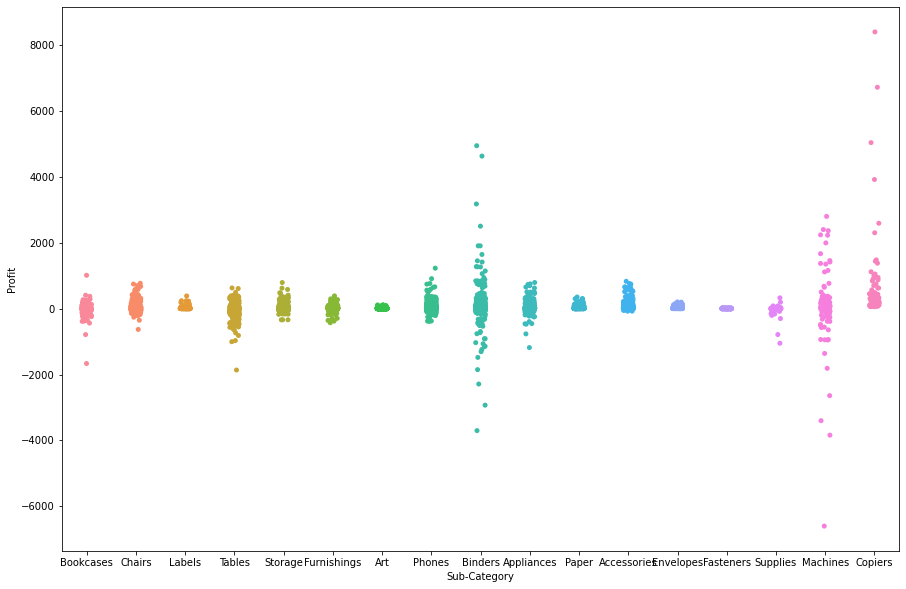

In [64]:
plt.subplots(figsize=(15,10))
sns.stripplot(x=ds_store['Sub-Category'],y=ds_store.Profit)

Above data tells us thatprofit is mostly made in selling Copiers while Machines mostly incurr losses

## City wise Data Analysis 

<AxesSubplot:xlabel='City'>

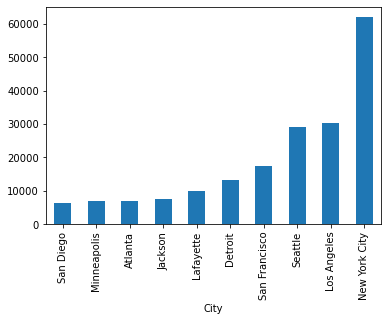

In [68]:
ds_store.groupby(ds_store.City)['Profit'].sum().sort_values().tail(10).plot.bar()

#### Above Plot tells top 10 cities in terms of yielding profit where New York city gives maximum profit

<AxesSubplot:xlabel='City'>

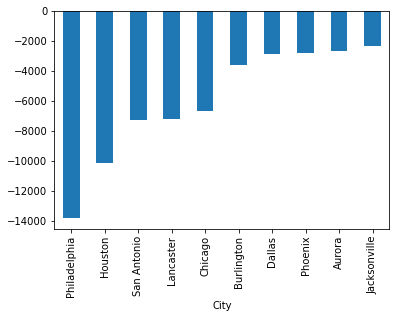

In [69]:
ds_store.groupby(ds_store.City)['Profit'].sum().sort_values().head(10).plot.bar()

##### Above Plot tells top 10 cities in terms of yielding loss where Philadelphia city gives maximum loss

### Now we try to see how we can help the business in cities incurring losses

In [139]:
ds_store=ds_store.drop('city wise profits',axis=1)

In [140]:
cities=['Philadelphia','Housten','San Antonio','Lancaster','Chicago','Burlington','Dallas','Phoenix','Aurora','Jacksonville']
loss_citydat=[]
for x in ds_store.City:
    if x in cities:
        loss_citydat.append(True)
    else:
        loss_citydat.append(False)
df_losses=ds_store[loss_citydat]        
        

In [141]:
df_losses=df_losses.sort_values(by='Profit')
pde=df_losses.head(20)

Now 'pde' has data of cities giving maximum losses and the products yielding loss

In [142]:
pde.groupby('Sub-Category').count()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Sub-Category,,,,,,,,,,,,
Appliances,1,1,1,1,1,1,1,1,1,1,1,1
Binders,7,7,7,7,7,7,7,7,7,7,7,7
Bookcases,1,1,1,1,1,1,1,1,1,1,1,1
Chairs,1,1,1,1,1,1,1,1,1,1,1,1
Machines,5,5,5,5,5,5,5,5,5,5,5,5
Supplies,1,1,1,1,1,1,1,1,1,1,1,1
Tables,4,4,4,4,4,4,4,4,4,4,4,4


In cities incurring losses it is Binders Machines and Tables which are sold more so they will incurr more loss 

# Summary


#### 1.MAXIMUM TRANSACTIONS were made in WEST REGION

#### 2.MAXIMUM SALES in WEST REGION

#### 3.MAXIMUM PROFITS in WEST REGION

#### 4.MAXIMUM SALES AND PROFIT in CONSUMER SEGMENT

#### 5.MOST ITEMS BOUGHT WERE FROM OFFICE SUPPLIES CATEGORY

#### 6.UNDER FURNITURE TABLES AND BOOKCASES INCURR MORE LOSS THAN PROFIT 

#### 7.MINIMUM PROFIT IS MADE IN PHILADELPHIA WHERE MAXIMUM DISCOUNT IS GIVEN

#### 8.MAXIMUM PROFIT IS MADE BY SELLING COPIERS

#### 9.PHONES AND CHAIRS HAVE MAXIMUM SALES

#### 10.PROFIT AND SALES ARE POSITIVELY CORRELATED WHEREAS PROFIT AND DISCOUNT SHARE NEGATIVE CORRELATION

#### 11.LEAST PROFIT IS MADE FROM CENTRAL REGION

#### 12.NEW YORK CITY ,LOS ANGELES AND SEATTLE ARE THE TOP PROFITABLE CITIES(IN DESCENDING ORDER)

# CONCLUSION

##### In furniture category tables, bookcases are sold in high discounts which result in losses. Attention is required in such products. Less sale might be helpful.
#### In cities like Philadelphia, Housten, San Antonio, sale of product like Binders machines and tables should be reduced as they comprise most of the losses. Another way can be improving the quality of these produts so as to reduce discounts on them so that profits are made.
#### In cities like New York , Los Angeles , Seattle profit can be further increased by increasing sale of office supplies and technology products like phones,copiers , chairs ,Accessories as they yield more profit

# Thankyou!